In [19]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import torch as th

- Before you start any pytorch/python coding, always check the environment first.

    `$ conda update -n base conda`

- current version of pytorch is 0.4

I want to fit a line equation: $ y = w x + b $, where $w$ and $b$ should be computed given data pairs $(x_i, y_i)$

Target:  $ y = 2 * x + 3 $


x:  (10,) [ 0.89481404  0.8664347   0.30161566  0.90749139  0.37782381  0.5456095
  0.2296434   0.21435994  0.73738561  0.42414991]
x =  [ 0.89481404  0.8664347   0.30161566  0.90749139  0.37782381  0.5456095
  0.2296434   0.21435994  0.73738561  0.42414991] (10,)
y =  [ 4.78962808  4.73286941  3.60323132  4.81498279  3.75564762  4.091219
  3.4592868   3.42871988  4.47477123  3.84829981] (10,)


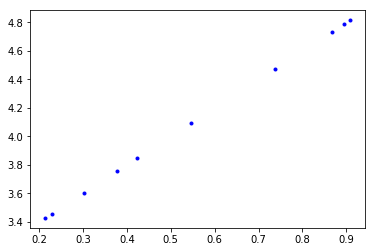

In [95]:
# Data generation for simulation

wTrue = 2
bTrue = 3

ndata = 10
# first let's consider N data points
x = np.random.rand(ndata)    # rand() returns floats in [0, 1), a uniform dist.
y = np.zeros(shape=(ndata))

print ('x: ', x.shape, x)
for i in range(x.shape[0]):
    y[i] = wTrue * x[i] + bTrue

print ('x = ', x, x.shape)
print ('y = ', y, y.shape)

plt.plot (x, y, 'b.')

In [96]:
# randomly initialize weights, use N(0,1), no reason

w = np.random.randn (1)
b = np.random.randn (1)

# or simply give any numer you like
w = np.array ( [1] )
b = np.array ( [10] )

print (w, b)

[1] [10]


Loss function and gradient

Let $z_i = y_{\mbox{pred}, i} - y_i$ for easy notion.

$ L = \sum_i (z_i - y_i)^2 = \sum_i \big( w x_i + b - y_i \big)^2$

$\frac{d L}{d w} = 2 * \sum_i \big( w x_i + b - y_i \big) x_i $

$\frac{d L}{d b} = 2 * \sum_i \big( w x_i + b - y_i \big) $

The gradient vector is a 2D vector composed of the two:


In [97]:
lr = 1e-5
nIter = 5

y_pred[0] = [ 10.89481404  10.8664347   10.30161566  10.90749139  10.37782381
  10.5456095   10.2296434   10.21435994  10.73738561  10.42414991]
@ loss:  0 416.738089952
69.5332286372 129.001344077
y_pred[1] = [ 10.89290183  10.86454223  10.30011592  10.90557037  10.37627108
  10.54394011  10.22819371  10.21292087  10.73558287  10.42256497]
@ loss:  1 416.523356095
69.5138548781 128.967896088
y_pred[2] = [ 10.89099013  10.86265026  10.29861658  10.90364986  10.37471877
  10.54227115  10.22674439  10.21148219  10.73378061  10.42098045]
@ loss:  2 416.308735448
69.4944862426 128.934456919
y_pred[3] = [ 10.88907894  10.86075879  10.29711763  10.90172986  10.37316685
  10.54060264  10.22529546  10.21004387  10.73197882  10.41939634]
@ loss:  3 416.09422795
69.4751227294 128.901026568
y_pred[4] = [ 10.88716826  10.85886782  10.29561907  10.89981037  10.37161535
  10.53893457  10.2238469   10.20860594  10.73017751  10.41781265]
@ loss:  4 415.879833541
69.455764337 128.867605033


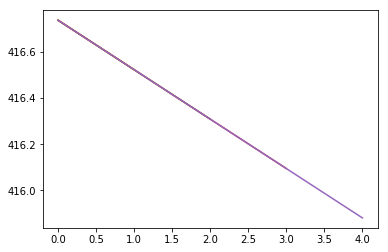

In [98]:
losses = []
for t in range (nIter):
    # forward pass: compute prediction of y
    y_pred = x * w + b
    print ('y_pred[{}] = {}'.format(t, y_pred))
    
    # compute and print loss
    loss = np.square (y_pred - y).sum()
    print ('@ loss: ', t, loss)
    losses.append(loss)
    # Backprob to compute gradients of w and b w.r.t loss
    gw = 2 * np.sum ((y_pred - y)*x)
    gb = 2 * np.sum ((y_pred - y))
    print (gw, gb)
    
    # update weights
    
    w = w - lr * gw
    b = b - lr * gb
    
    plt.plot (range(t+1), losses)

@ estimate:  [ 0.39083384] [ 8.85834082]   with loss  249.298348979


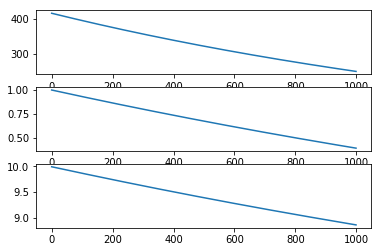

In [99]:
losses = []
wt = []
bt = []
nIter = 1000
for t in range (nIter):
    # forward pass: compute prediction of y
    y_pred = x * w + b
    #print ('y_pred[{}] = {}'.format(t, y_pred))
    
    # compute and print loss
    loss = np.square (y_pred - y).sum()
    #print ('@ loss: ', t, loss)
    losses.append(loss)
    # Backprob to compute gradients of w and b w.r.t loss
    gw = 2 * np.sum ((y_pred - y)*x)
    gb = 2 * np.sum ((y_pred - y))
    #print (gw, gb)
    
    # update weights
    
    w = w - lr * gw
    b = b - lr * gb
    
    wt.append (w)
    bt.append (b)
    #plt.plot (range(t+1), losses)
#

print ('@ estimate: ', w, b, '  with loss ', loss)
plt.subplot(311)
plt.plot (range(nIter), losses)
plt.subplot(312)
plt.plot (range(nIter), wt)
plt.subplot(313)
plt.plot (range(nIter), bt)

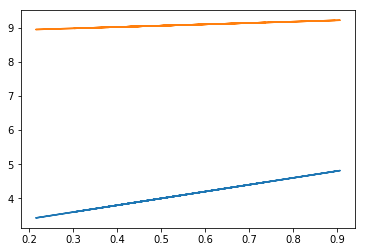

In [100]:
y_pred = x * w + b
plt.plot (x, y, x, y_pred)

## You must try repeatedly various parameter values:
1. change the `learning rate` from 0.1 to 1e-7
2. various inital values of $w$ and $b$.
3. the number of iterations

## When to stop? It is when you are tired enough to be satisfied.